In [1]:
import importlib
import shiftNMF
importlib.reload(shiftNMF)
from shiftNMF import ShiftNMF
from nnls_l1 import nnls
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from helpers.generators import *
from helpers.data import X_WINE, PPM_WINE
import Hardmodel_single_peaks
importlib.reload(Hardmodel_single_peaks)
from Hardmodel_single_peaks import Single_Model
import Hardmodel
importlib.reload(Hardmodel)
from Hardmodel import Hard_Model
import scipy
from scipy.signal import find_peaks
import itertools
import torch

import helpers.fit_functions 
importlib.reload(helpers.fit_functions)
from helpers.fit_functions import *

# shiftNMF

[5.99978451 5.99915313 5.99852176 ... 0.50114961 0.50051823 0.49988686]
1.64330490918214
1.2644805964802792


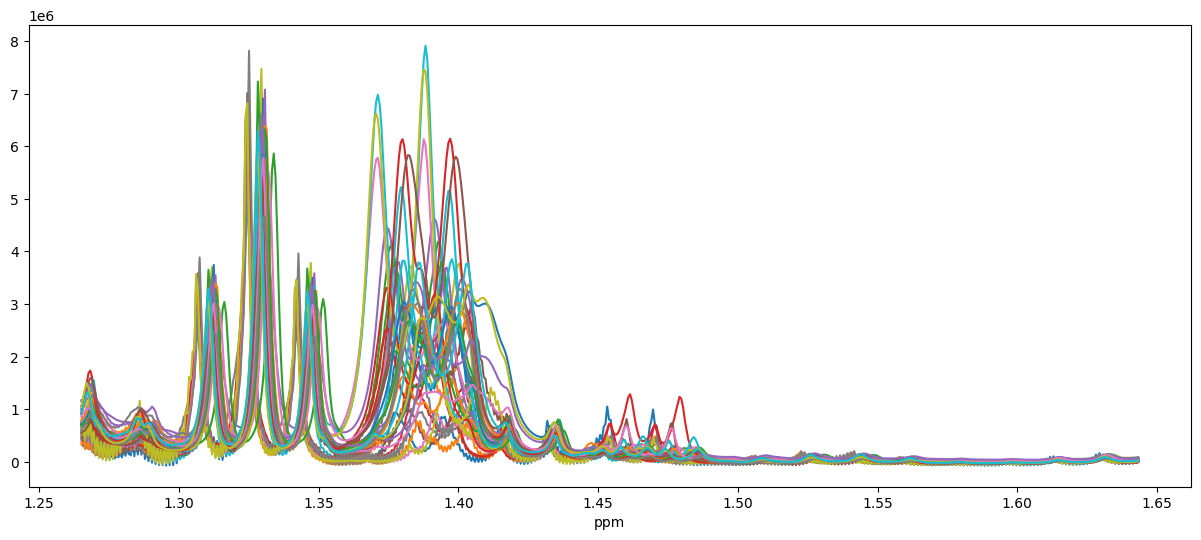

In [2]:
# 1.3-1.6
si = 6900
ei = 7500


print(PPM_WINE)
X = X_WINE[:,si:ei]
print(PPM_WINE[si])
print(PPM_WINE[ei])
ppm = PPM_WINE[si:ei]
plt.figure(figsize=(15,6))
plt.plot(ppm,X.T)
plt.xlabel("ppm")
plt.show()

epoch: 1000, Loss: 0.0571060760119546, Tau: 438.473488366172544


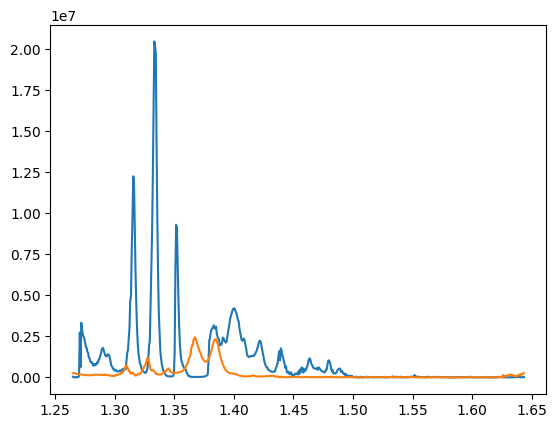

In [3]:
torch.manual_seed(40)
nmf = ShiftNMF(X, 2, lr=0.1, alpha=1e-6, patience=30, min_imp=-10000)
W_est, H_est, tau_est = nmf.fit(verbose=1, max_iter=1000, tau_iter=0, Lambda=0.000)
plt.plot(ppm,H_est.T)
plt.show()


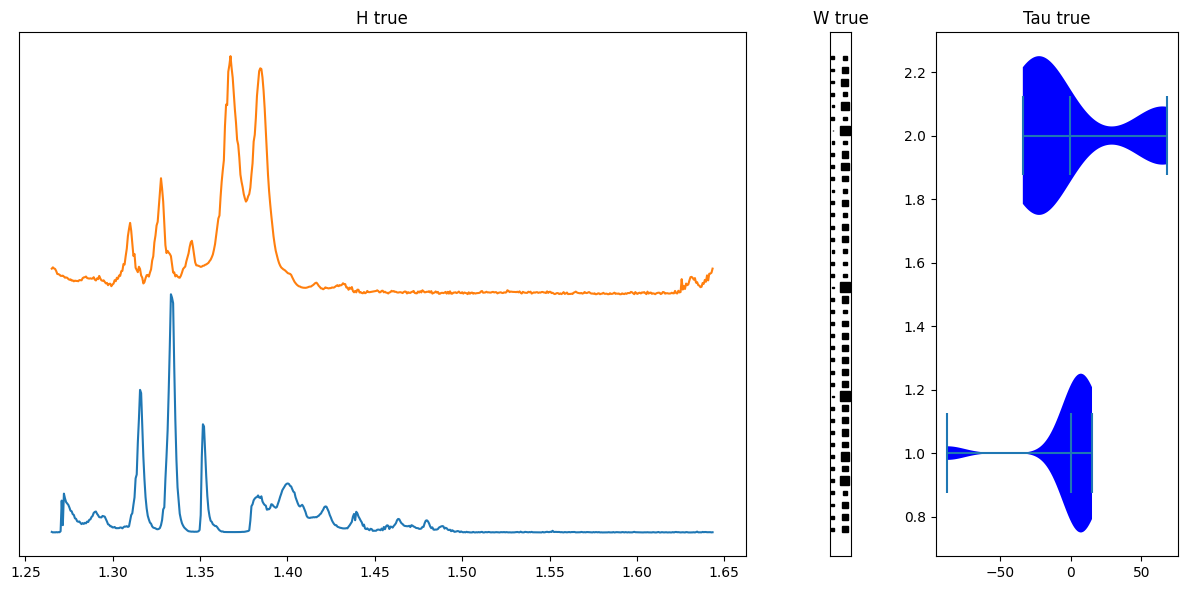

In [4]:
from helpers.plot import *
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 1, 1])

fig = plt.figure(figsize=(12, 6))
N, M = X[:,0:3000].shape
H_scaled = np.zeros_like(H_est)
for i, vec in enumerate(H_est):
    H_scaled[i] = vec/max(vec)

# Plot H and H_est
ax1 = plt.subplot(gs[0])
plotSpaced(ax1, ppm, H_scaled.T)
ax1.set_title('H true')

ax2 = plt.subplot(gs[1])
ax2.set_title('W true')
hinton(W_est.T, ax=ax2)

ax3 = plt.subplot(gs[2])
violin_parts = ax3.violinplot(tau_est, showmeans=True, showmedians=False, vert=False)
ax3.set_title('Tau true')
change_violin_colors(violin_parts, color_list=['blue']*N)
# change_violin_colors(violin_parts, [l.get_color() for l in ax3.get_children()[:3]])

# Set tight layout
plt.tight_layout()
plt.show()

# Hardmodel

Found peaks:[385 462 491 519]
sigma: 42.16658279834226 n:1.9316843135305783e-06
sigma: 4.018764777624451 n:0.7157366082260103
sigma: 5.894792226887872 n:1.3222151310664403e-07
sigma: 5.859105227731652 n:0.5919677511811536
Lorentzian %:ss: 0.06350154333759715
tensor([1.2238e-07, 5.7998e-01, 2.6927e-08, 9.7118e-01],
       grad_fn=<SigmoidBackward0>)
Sigma:
Parameter containing:
tensor([54.7224,  4.0800,  6.7797,  5.8419], requires_grad=True)
hypothesises:
{(0, 1), (1, 3), (2,), (1, 2), (0, 1, 2), (0, 1, 3), (0, 3), (0, 2, 3), (1, 2, 3), (2, 3), (1,), (0, 2), (0, 1, 2, 3), (0,), (3,)}


c:\Users\lucas\Documents\UNI\Bachelorprojekt\helpers\fit_functions.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Loss: 0.10217414489358362
FINAL FOUND VALUES
means:
[452.      490.66666 505.      438.     ]
means in ppm
[1.3579239269467376, 1.3339317204756203, 1.3244611126580734, 1.3667631609097812]
sigmas:
[30.282114   5.5671897  6.310759  30.75101  ]
J coupling:
[134.  29.  28. 106.]
coupling in ppm
[0.0846040965034156, 0.018309841780589586, 0.017678467926086405, 0.06692562857732831]
multiplicity
[2 3 2 2]
N
[2.0266850e-03 1.0665962e-02 9.5170923e-04 5.7404147e-08]
W:
[[0.        0.        0.        0.        0.        0.        1.9103808
  0.        4.751589  1.2746036 0.        3.4086852 0.        0.
  0.       ]]
Found peaks:[410 437 472 500 528]
sigma: 13.793776592672405 n:1.3390982705947603e-07
sigma: 15.253312170537015 n:2.68215989640249e-07
sigma: 9.609615644520586 n:0.9999955366879928
sigma: 8.029836761988257 n:0.9999659577159885
sigma: 7.924408067279278 n:0.9999665119827468
Lorentzian %:oss: 0.027169970416492138
tensor([3.1567e-08, 2.3871e-08, 1.0000e+00, 1.0000e+00, 1.0000e+00],
     

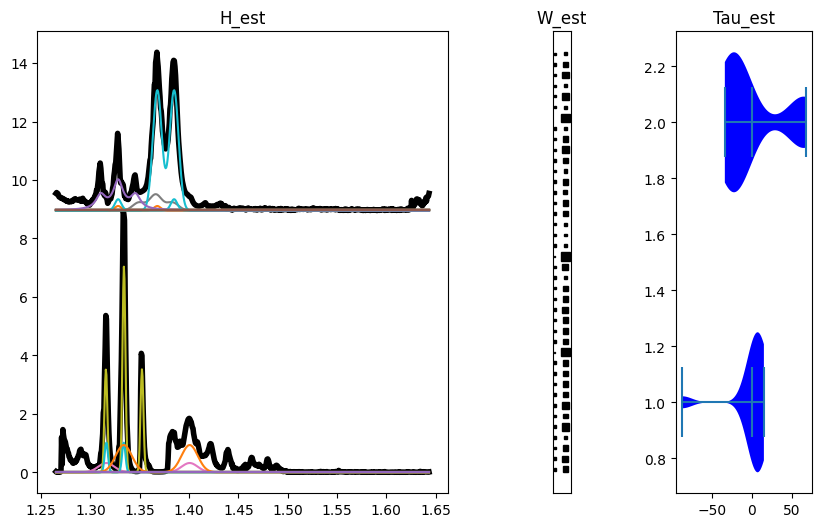

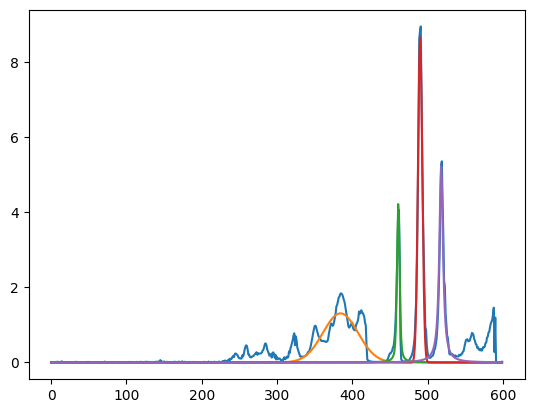

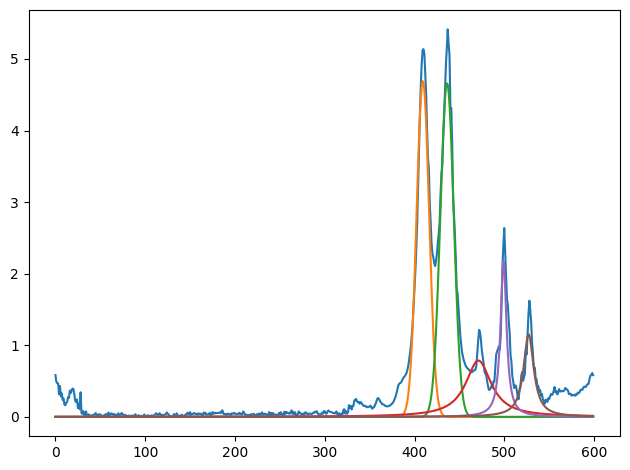

In [7]:
from helpers.plot import *
fig = plt.figure(figsize=(10, 6))
# Create a gridspec object with 2 rows and 3 columns
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 1, 1])

# Plot H and H_est
ax1 = plt.subplot(gs[0])
# plotSpaced(ax1, np.arange(H_est.shape[1]), H_est.T)
ax1.set_title('H_est')

ax2 = plt.subplot(gs[1])
ax2.set_title('W_est')
hinton(W_est.T, ax=ax2)

ax3 = plt.subplot(gs[2])
violin_parts = ax3.violinplot(tau_est, showmeans=True, showmedians=False, vert=False)
ax3.set_title('Tau_est')
change_violin_colors(violin_parts, color_list=['blue']*3)
# change_violin_colors(violin_parts, [l.get_color() for l in ax3.get_children()[:3]])

# plt.figure(figsize=(15,5))
# plt.plot(H_est.T)
# plt.savefig("shiftcomponents")
# plt.clf()
ymax = 0
for i in range(len(H_est)):
    ymax = max(ymax,(H_est[i]/np.std(H_est[i])).max())
yoffset = ymax
reg_paths = []
lambda_axis = []
C_path = []
losses = []

for i in range(len(H_est)):
    means, sigmas, n = single_fit(H_est[i], min_height=2/10, min_sigma=1, lr=0.1 , plot=True)
    #diff_matrix = calc_difference_matrix(sigmas)
    diff_matrix = calc_difference_matrix(np.ones((len(sigmas))))
    hypothesis = peak_hypothesis(diff_matrix)
    hardmodel = Hard_Model(H_est[i], hypothesis, means, sigmas, n)

    W, C, running_loss, path, lambdas, loss = hardmodel.fit(threshold=0.25, verbose=True, return_loss=True)
    reg_paths.append(path)
    lambda_axis.append(lambdas)
    C_path.append(C)
    losses.append(loss)
    means, sigma, j_coup, mult, n, w = hardmodel.return_values()
    print("FINAL FOUND VALUES")
    print("means:")
    print(means)
    print("means in ppm")
    print([ppm[int(m)] for m in means])
    print("sigmas:")
    print(sigma)
    print("J coupling:")
    print(j_coup)
    print("coupling in ppm")
    print([ppm[0]-ppm[int(m)] for m in j_coup])
    print("multiplicity")
    print(mult)
    print("N")
    print(n)

    print("W:")
    print(W)
    ## TODO change this to be the true underlying components from H_ART not the shift found components, they need to be scaled accordingly.
    # plt.figure(figsize=(15,5))
    # plt.plot(H_est[i]/np.std(H_est[i]), linewidth=5, color="k")
    ax1.plot(ppm,H_est[i]/np.std(H_est[i])+yoffset*i, linewidth=4, color="k")
    for j, vec in enumerate(C):
        ax1.plot(ppm,vec*W[:,j]+yoffset*i)
# Set tight layout
plt.tight_layout()
plt.show()

[1.0, 0.49910431878583755, 0.3945946244407506, 0.346337817201374, 0.3162900871129325, 0.31485938023023236, 0.30707518544273127, 0.30694270604248963, 0.30435895706541316, 0.2860145554251922, 0.2810918998937218, 0.2671379110805055, 0.2601458188766922, 0.25164167595240766, 0.25153813332673874, 0.24912138071193976, 0.24855178330595795, 0.2475907240384185, 0.2455226129068225, 0.24405002811980764]
[ 8 11 13  9  6  2  7 14 10  3 12  1  5  0  4]


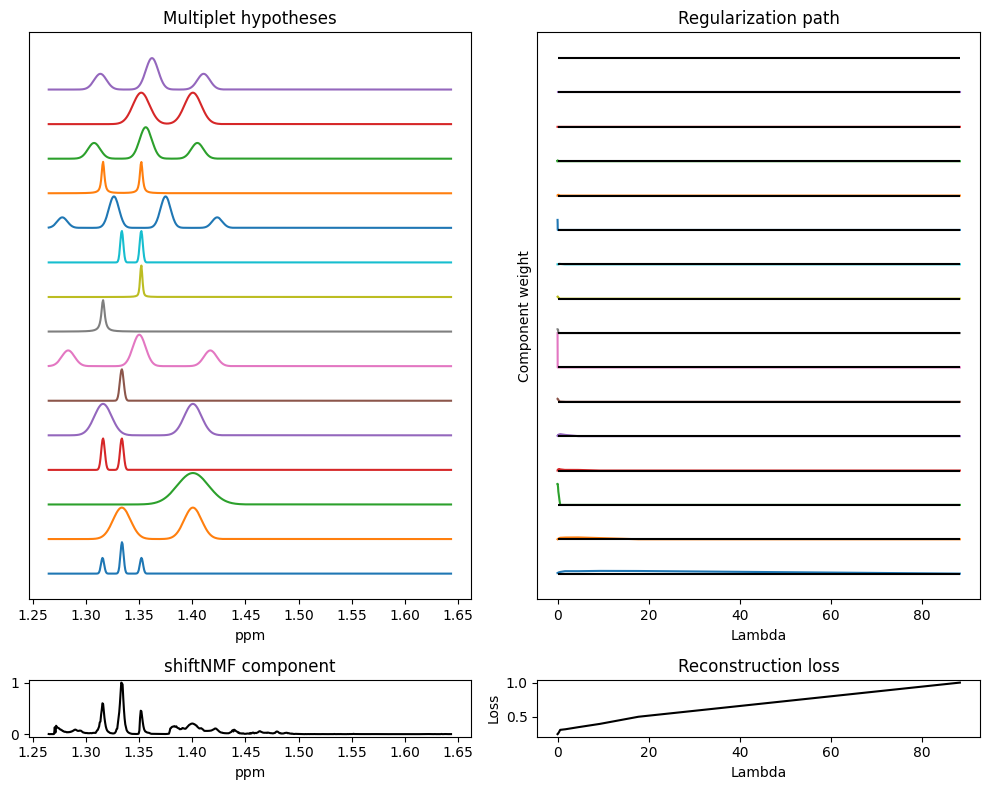

[1.0, 0.39789922777959447, 0.3806098197531545, 0.37774977904758533, 0.2885787988286632, 0.19409218212260487, 0.16732617976861333, 0.16315911106561987, 0.15264059971592522, 0.14820072635077913, 0.14737734137108705, 0.14703387447711147, 0.14402315946199903, 0.14394219434947575, 0.1434925220819629, 0.14147249664415817, 0.1411124332902562, 0.140880993104254, 0.14063621878525664, 0.14051085066884772, 0.1404642165279647]
[14 12 29 24  6  2 23  4  9 11 21 17  7 26 10 22 25 27 28  0 15 19 18 16
 13  8  5  3  1 20 30]


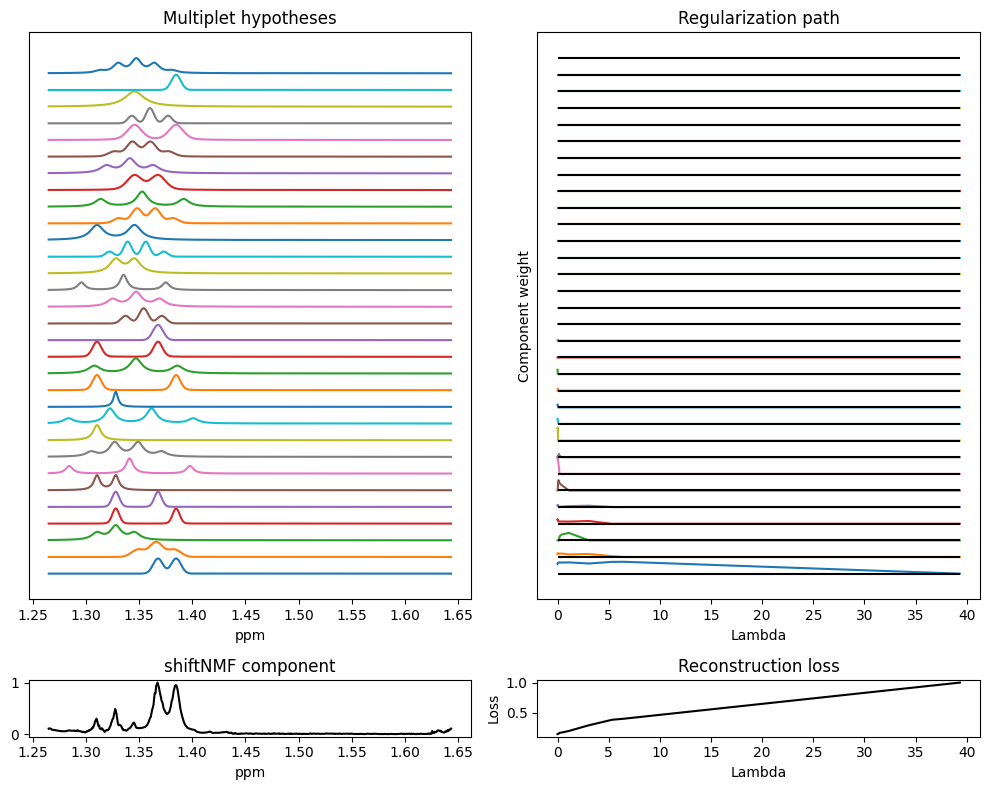

In [9]:

for i in range(len(reg_paths)):
    path = reg_paths[i][0]
    lambdas = lambda_axis[i][0]
    C = C_path[i]
    loss = losses[i]
    print(loss)
    fig = plt.figure(figsize=(10, 8))
    # Create a gridspec object with 2 rows and 3 columns
    gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[10,1])

    # Plot H and H_est
    ax1 = plt.subplot(gs[0])
    # plotSpaced(ax1, np.arange(H_est.shape[1]), H_est.T)
    ax1.set_title('Multiplet hypotheses')

    ax1.set_xlabel("ppm")
   
    x = np.arange(H_est.shape[1])

    ax2 = plt.subplot(gs[1])
    ax2.set_title('Regularization path')
    ax2.set_xlabel("Lambda")
    ax2.set_ylabel("Component weight")

    ax1.tick_params(left = False, labelleft = False)
    ax2.tick_params(left = False, labelleft = False)

    ax3 = plt.subplot(gs[2])
    # plotSpaced(ax1, np.arange(H_est.shape[1]), H_est.T)
    ax3.set_title('shiftNMF component')
    ax3.plot(ppm, H_est[i]/max(H_est[i]), color="k")
    ax3.set_xlabel("ppm")

    ax4 = plt.subplot(gs[3])
    # plotSpaced(ax1, np.arange(H_est.shape[1]), H_est.T)
    ax4.set_title('Reconstruction loss')
    ax4.plot(lambdas, loss, color="k")
    ax4.set_xlabel("Lambda")
    ax4.set_ylabel("Loss")

   
    sort_indices = np.argsort([np.trapz(p,lambdas) for p in path])
    print(sort_indices)
    path = path[sort_indices]
    C = C[sort_indices]

    ymax = 1.1
    yoffset = ymax
    t = 0

    nr_of_components = len(C)

    for j in range(nr_of_components):
            ax1.plot(ppm,C[j]/max(C[j])+yoffset*t)
            t += 1

    
    ymax = path[:nr_of_components].max()
    yoffset = ymax
    t = 0
    for j in range(nr_of_components):
            ax2.plot(lambdas,path[j]+yoffset*t)
            ax2.hlines(yoffset*t,lambdas[-1],lambdas[0], color="k")
            t +=1
    ax2.hlines(yoffset*t,lambdas[-1],lambdas[0], color="k")


    plt.tight_layout()
    plt.show()